In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings("ignore")
my_color_palette = ["#d81159", "#8f2d56","#218380","#fbb13c","#73d2de"]

# Importando los datos
Una vez que se a descomprimido el dataset podemos encontrar 7 archivos:
1. holidays_events.csv
2. items.csv
3. sample_submission.csv
4. stores.csv
5. test.csv
6. train.csv
7. transaction.csv

A continuación cargamos cada uno de los archivos para analizar, cantidad de datos, tipos de datos y tamaño


In [4]:
# Archivo raíz
data_folder = 'data/'

df_holidays = pd.read_csv(data_folder + "holidays_events.csv")
df_items = pd.read_csv(data_folder + "items.csv")
df_sample_submission = pd.read_csv(data_folder + "sample_submission.csv")
df_stores = pd.read_csv(data_folder + "stores.csv")
df_transactions = pd.read_csv(data_folder + "transactions.csv")
df_train = pd.read_csv(data_folder + "train_start.csv")
# df_test = pd.read_csv(data_folder + "test.csv")

# Analizamos el contenido y estrutura de cada dataframe
## Holidays

In [5]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [6]:
# Fecha de inicio y fin de los registros Holidays
print("Fecha de Inicio: ",df_holidays.date.min()," última fecha de registro ", df_holidays.date.max())

# Periodo que comprende el registro de Holidays
df_holidays["date"] = pd.to_datetime(df_holidays.date, cache=True)
print("Días registrados: ", df_holidays.date.max() - df_holidays.date.min())

Fecha de Inicio:  2012-03-02  última fecha de registro  2017-12-26
Días registrados:  2125 days 00:00:00


In [7]:

df_holidays['m_d'] = df_holidays['date'].dt.strftime('%m-%d')
df_holidays['m_d'].value_counts()

m_d
06-25    19
07-03    12
12-22    12
05-12     8
04-21     7
         ..
02-28     1
04-13     1
05-26     1
08-11     1
09-29     1
Name: count, Length: 112, dtype: int64

In [8]:
df_holidays[df_holidays['m_d']=='06-25']

date     type    locale locale_name  \
7   2012-06-25  Holiday  Regional    Imbabura   
8   2012-06-25  Holiday     Local   Latacunga   
9   2012-06-25  Holiday     Local     Machala   
58  2013-06-25  Holiday  Regional    Imbabura   
59  2013-06-25  Holiday     Local     Machala   
60  2013-06-25  Holiday     Local   Latacunga   
110 2014-06-25  Holiday     Local   Latacunga   
111 2014-06-25  Holiday     Local     Machala   
112 2014-06-25  Holiday  Regional    Imbabura   
113 2014-06-25    Event  National     Ecuador   
176 2015-06-25  Holiday     Local     Machala   
177 2015-06-25  Holiday  Regional    Imbabura   
178 2015-06-25  Holiday     Local   Latacunga   
258 2016-06-25  Holiday     Local     Machala   
259 2016-06-25  Holiday  Regional    Imbabura   
260 2016-06-25  Holiday     Local   Latacunga   
315 2017-06-25  Holiday  Regional    Imbabura   
316 2017-06-25  Holiday     Local   Latacunga   
317 2017-06-25  Holiday     Local     Machala   

                                   description  transferred    m_d  
7                Provincializacion de Imbabura        False  06-25  
8                   Cantonizacion de Latacunga        False  06-25  
9                         Fundacion de Machala        False  06-25  
58               Provincializacion de Imbabura        False  06-25  
59                        Fundacion de Machala        False  06-25  
60                  Cantonizacion de Latacunga        False  06-25  
110                 Cantonizacion de Latacunga        False  06-25  
111                       Fundacion de Machala        False  06-25  
112              Provincializacion de Imbabura        False  06-25  
113  Mundial de futbol Brasil: Ecuador-Francia        False  06-25  
176                       Fundacion de Machala        False  06-25  
177              Provincializacion de Imbabura        False  06-25  
178                 Cantonizacion de Latacunga        False  06-25  
258                       Fundacion de Machala        False  06-25  
259              Provincializacion de Imbabura        False  06-25  
260                 Cantonizacion de Latacunga        False  06-25  
315              Provincializacion de Imbabura        False  06-25  
316                 Cantonizacion de Latacunga        False  06-25  
317                       Fundacion de Machala        False  06-25

In [9]:
df_holidays['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

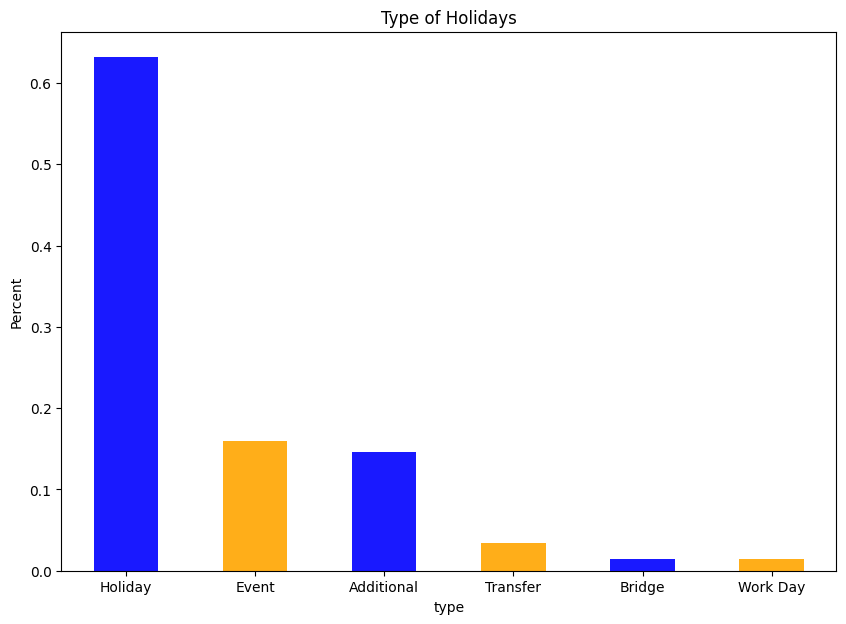

In [10]:
fig = plt.figure(figsize=(10, 7))
df_holidays.type.value_counts(
    normalize=True).plot(kind='bar', alpha=0.9, rot=0, color={"orange", "blue"})
plt.title('Type of Holidays')
plt.ylabel('Percent')
plt.show()

In [11]:
df_holidays['transferred'].value_counts()

transferred
False    338
True      12
Name: count, dtype: int64

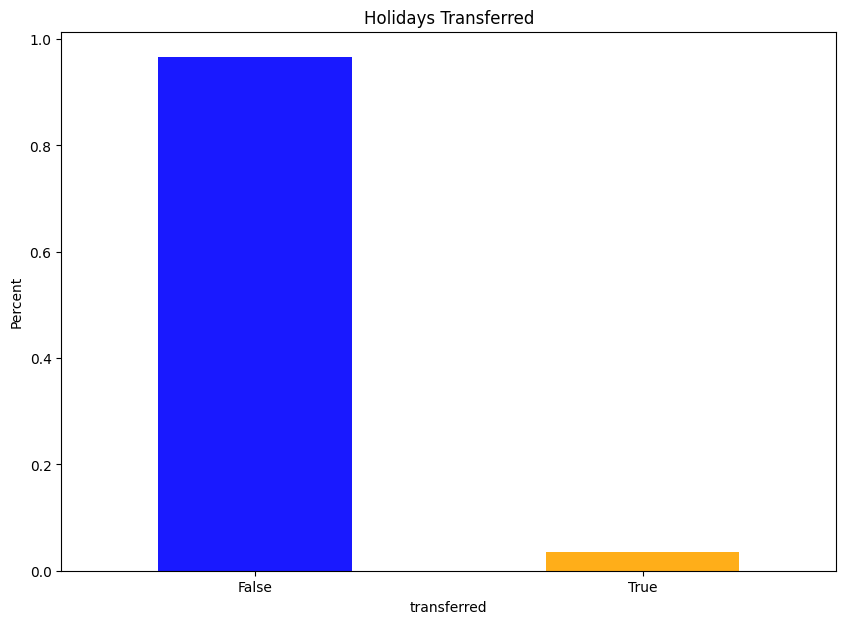

In [12]:
fig = plt.figure(figsize=(10, 7))
df_holidays.transferred.value_counts(
    normalize=True).plot(kind='bar', alpha=0.9, rot=0, color={"orange", "blue"})
plt.title('Holidays Transferred')
plt.ylabel('Percent')
plt.show()

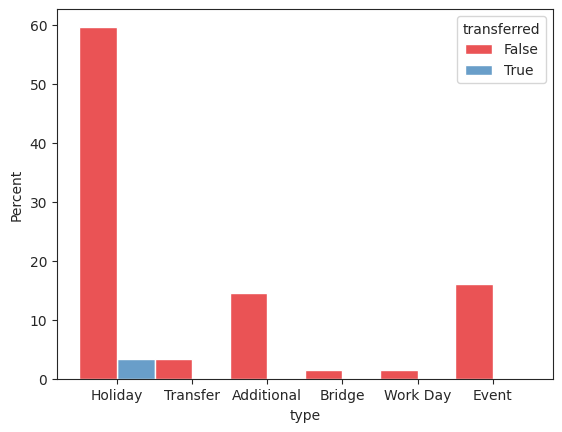

In [13]:
with sns.axes_style(style='ticks'):
    d = sns.histplot(x="type",  hue='transferred', data=df_holidays,
                     stat='percent', multiple="dodge", palette='Set1')

In [14]:
df_holidays['locale'].value_counts()

locale
National    174
Local       152
Regional     24
Name: count, dtype: int64

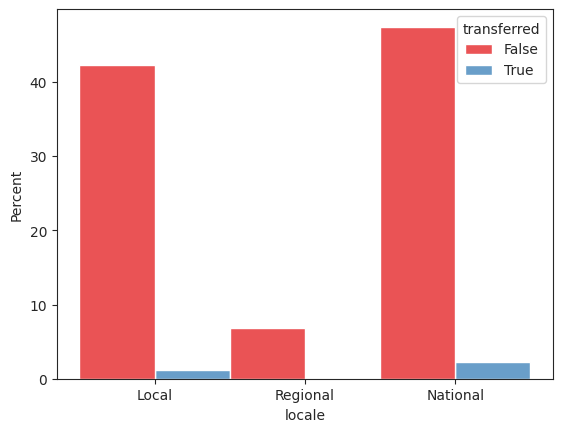

In [15]:
with sns.axes_style(style='ticks'):
    d = sns.histplot(x="locale",  hue='transferred', data=df_holidays,
                     stat='percent', multiple="dodge", palette='Set1')

In [16]:
df_holidays.groupby(['type', 'locale'])['locale_name'].count()

type        locale  
Additional  Local        11
            National     40
Bridge      National      5
Event       National     56
Holiday     Local       137
            National     60
            Regional     24
Transfer    Local         4
            National      8
Work Day    National      5
Name: locale_name, dtype: int64

### Items

In [17]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.2+ KB


In [18]:
df_items.head()

item_nbr        family  class  perishable
0     96995     GROCERY I   1093           0
1     99197     GROCERY I   1067           0
2    103501      CLEANING   3008           0
3    103520     GROCERY I   1028           0
4    103665  BREAD/BAKERY   2712           1

In [19]:
df_items['family'].value_counts()

family
GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
LAWN AND GARDEN                 26
PREPARED FOODS                  26
LADIESWEAR                      21
LINGERIE                        20
AUTOMOTIVE                      20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
GROCERY II                      14
PET SUPPLIES                    14
SEAFOOD                          8
MAGAZINES    

In [20]:
print("Número de familia: ",len(df_items['family'].unique()))
print("Número de clases: ", len(df_items['class'].unique()))
print("Número de productos perecederos y no perecederos:\n",
      df_items['perishable'].value_counts())

Número de familia:  33
Número de clases:  337
Número de productos perecederos y no perecederos:
 perishable
0    3114
1     986
Name: count, dtype: int64


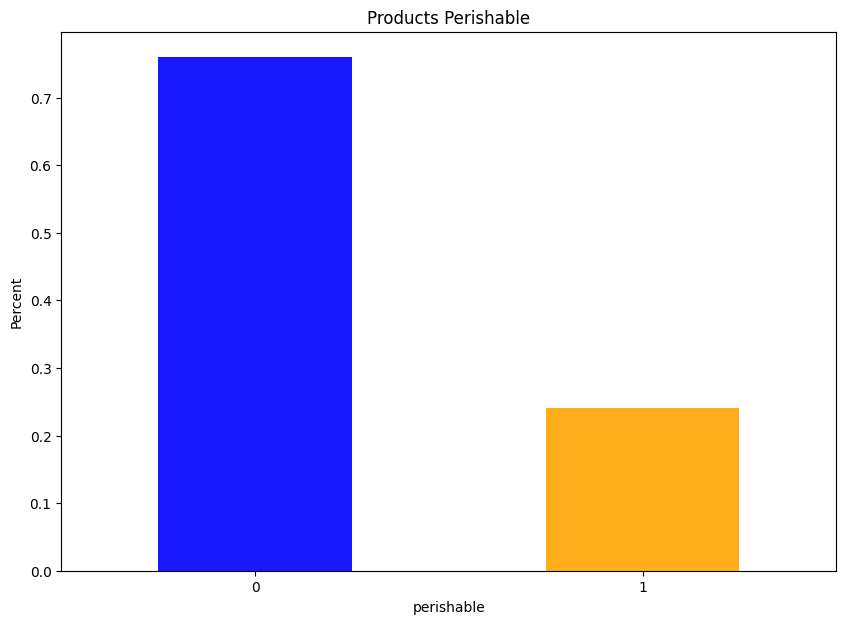

In [21]:
fig = plt.figure(figsize=(10, 7))
df_items.perishable.value_counts(
    normalize=True).plot(kind='bar', alpha=0.9, rot=0, color={"orange", "blue"})
plt.title('Products Perishable')
plt.ylabel('Percent')
plt.show()

# Stores

In [22]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


No se tienen valores nulos, hay dos variables numéricas y 3 categóricas

In [23]:
print("Número de Ciudades: ", len(df_stores['city'].unique()))
print(df_stores['city'].unique())
print("Número de Estados: ", len(df_stores['state'].unique()))
print(df_stores['state'].unique())
print("Tipos de Stores: ", len(df_stores['type'].unique()))
print(df_stores['type'].unique())
print("Stores Similares (clusters): ", len(df_stores['cluster'].unique()))
print(df_stores['cluster'].unique())

Número de Ciudades:  22
['Quito' 'Santo Domingo' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']
Número de Estados:  16
['Pichincha' 'Santo Domingo de los Tsachilas' 'Cotopaxi' 'Chimborazo'
 'Imbabura' 'Bolivar' 'Pastaza' 'Tungurahua' 'Guayas' 'Santa Elena'
 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas' 'Manabi']
Tipos de Stores:  5
['D' 'B' 'C' 'E' 'A']
Stores Similares (clusters):  17
[13  8  9  4  6 15  7  3 12 16  1 10  2  5 11 14 17]


In [24]:
df_stores.groupby('state')['city'].count()

state
Azuay                              3
Bolivar                            1
Chimborazo                         1
Cotopaxi                           2
El Oro                             2
Esmeraldas                         1
Guayas                            11
Imbabura                           1
Loja                               1
Los Rios                           2
Manabi                             3
Pastaza                            1
Pichincha                         19
Santa Elena                        1
Santo Domingo de los Tsachilas     3
Tungurahua                         2
Name: city, dtype: int64

# Transactions

In [25]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


No se tienen datos nulos, uan variable categórica, dos variables numéricas

In [26]:
df_transactions["date"] = pd.to_datetime(df_transactions.date, cache=True)

In [27]:
# Fecha de inicio y fin de los registros de transacciones
print("Fecha de Inicio: ", df_transactions.date.min(),
      " última fecha de registro ", df_transactions.date.max())

# Periodo que comprende el registro de Transacciones
print("Días registrados: ", df_transactions.date.max() - df_transactions.date.min())

Fecha de Inicio:  2013-01-01 00:00:00  última fecha de registro  2017-08-15 00:00:00
Días registrados:  1687 days 00:00:00


In [28]:
len(df_transactions['date'].unique())

1682

In [29]:
stores = df_transactions.groupby(
    ['date', 'store_nbr'], as_index=False)['transactions'].sum()

In [30]:
px.line(stores, x="date", y="transactions", color="store_nbr",
        title="Transactions of the stores")

# Train

In [31]:
df_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67029280 entries, 0 to 67029279
Data columns (total 6 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   id           67029280 non-null  int64  
 1   date         67029280 non-null  object 
 2   store_nbr    67029280 non-null  int64  
 3   item_nbr     67029280 non-null  int64  
 4   unit_sales   67029280 non-null  float64
 5   onpromotion  67029280 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 2.6+ GB


Podemos observar que tenemos 2 variables numéricas, 3 variables categóricas. Además, la variable onpromotion tiene 21,657,651 datos nulos.


In [32]:
df_train["date"] = pd.to_datetime(df_train.date, cache=True)

In [33]:
# Fecha de inicio y fin 
print("Fecha de Inicio: ", df_train.date.min(),
      " última fecha de registro ", df_train.date.max())

# Periodo que comprende el registro de Transacciones
print("Días registrados: ", df_train.date.max() - df_train.date.min())

Fecha de Inicio:  2014-04-01 00:00:00  última fecha de registro  2017-08-15 00:00:00
Días registrados:  1232 days 00:00:00


In [34]:
print(df_train.duplicated().sum())

0


In [35]:
len(df_train['id'].unique()), len(df_train['date'].unique())

(67029280, 1230)

In [36]:
df_train['unit_sales'].describe()

count    6.702928e+07
mean     7.990105e+00
std      2.065334e+01
min     -1.537200e+04
25%      2.000000e+00
50%      4.000000e+00
75%      8.992000e+00
max      4.414200e+04
Name: unit_sales, dtype: float64

Como se puede notar no se tienen datos duplicados, en la variable objetivo podemos ver la presencia de datos negativos, estas
podrían verse como pérdidas donde podemos considerar elementos perecederos

## Valores Negativos

In [37]:
df_neg = df_train[df_train['unit_sales'] < 0]
df_neg.shape

(3548, 6)

<Axes: xlabel='date'>

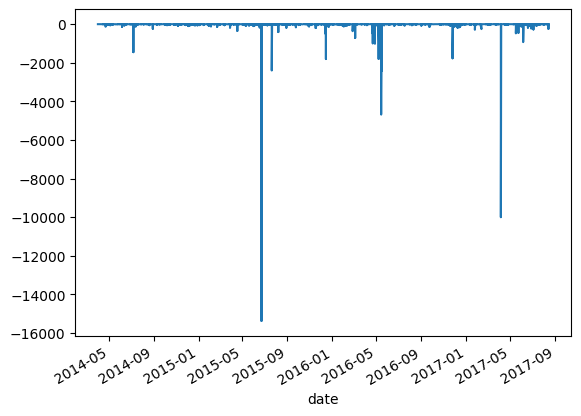

In [38]:
df_neg.set_index('date')['unit_sales'].plot()

Como podemos ver arriba tenemos 7795 datos negativos. A continuación analicemos los productos que están ligados a estos valores

In [39]:
df_neg  = pd.merge(df_neg, df_items, on='item_nbr')
df_neg = pd.merge(df_neg, df_stores, on='store_nbr')

In [40]:
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           3548 non-null   int64         
 1   date         3548 non-null   datetime64[ns]
 2   store_nbr    3548 non-null   int64         
 3   item_nbr     3548 non-null   int64         
 4   unit_sales   3548 non-null   float64       
 5   onpromotion  3548 non-null   bool          
 6   family       3548 non-null   object        
 7   class        3548 non-null   int64         
 8   perishable   3548 non-null   int64         
 9   city         3548 non-null   object        
 10  state        3548 non-null   object        
 11  type         3548 non-null   object        
 12  cluster      3548 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 336.2+ KB


In [41]:
df_neg['date'].value_counts()

date
2014-12-23    21
2014-12-11    15
2016-04-08    13
2015-09-16    13
2017-01-12    13
              ..
2014-05-24     1
2014-05-25     1
2014-05-27     1
2014-05-28     1
2015-11-21     1
Name: count, Length: 1104, dtype: int64

In [42]:
df_neg['unit_sales'].describe()

count     3548.000000
mean       -26.693853
std        344.960479
min     -15372.000000
25%         -4.000000
50%         -1.000000
75%         -1.000000
max         -0.002000
Name: unit_sales, dtype: float64

In [43]:
df_neg = df_neg.sort_values(by=['unit_sales'])

In [44]:
df_neg.head(10)

id       date  store_nbr  item_nbr  unit_sales  onpromotion  \
1204   49592112 2015-06-22         18   1166474    -15372.0        False   
3100  111606073 2017-04-06         32   1158720    -10002.0        False   
2184   79204331 2016-05-14         53    119026     -4673.0        False   
2185   79204535 2016-05-14         53    323921     -3606.0        False   
2191   79205524 2016-05-14         53   1229028     -3600.0        False   
2195   79361005 2016-05-16         29    812769     -2400.0        False   
1282   51895953 2015-07-20         49   1082042     -2400.0        False   
1707   64987178 2015-12-15         44    257847     -1806.0        False   
2155   78438447 2016-05-07          2    265559     -1797.0        False   
2717   97978639 2016-11-25         39    215331     -1768.0        False   

                family  class  perishable       city      state type  cluster  
1204         BEVERAGES   1120           0      Quito  Pichincha    B       16  
3100         GROCERY I   1040           0  Guayaquil     Guayas    C        3  
2184          CLEANING   3026           0      Manta     Manabi    D       13  
2185     PERSONAL CARE   4114           0      Manta     Manabi    D       13  
2191     PERSONAL CARE   4176           0      Manta     Manabi    D       13  
2195  LIQUOR,WINE,BEER   1318           0  Guayaquil     Guayas    E       10  
1282         GROCERY I   1040           0      Quito  Pichincha    A       11  
1707         BEVERAGES   1120           0      Quito  Pichincha    A        5  
2155         GROCERY I   1072           0      Quito  Pichincha    D       13  
2717         GROCERY I   1040           0     Cuenca      Azuay    B        6

In [45]:
df_neg[df_neg['item_nbr'] == 1166474]

id       date  store_nbr  item_nbr  unit_sales  onpromotion  \
1204  49592112 2015-06-22         18   1166474    -15372.0        False   
1429  56041960 2015-09-08         20   1166474        -1.0        False   

         family  class  perishable   city      state type  cluster  
1204  BEVERAGES   1120           0  Quito  Pichincha    B       16  
1429  BEVERAGES   1120           0  Quito  Pichincha    B        6

El `item_nbr` = 1166474 muestra dos valles en las fechas: 2015-06-22 y 2015-09-08. Revisando el calendario podemos observar que:

* 2015-06-22 = Fiesta del Inti Raymi: La preparación de la festividad era estricta, pues en los previos «tres días no se comía sino un poco de maíz blanco, crudo, y unas pocas de yerbas que llaman chúcam y agua pura. 
* 2015-09-08 = Día Internacional de Gato

Estos valles han sido generados sobre productos de la familia BEVERAGES por las celebraciones y cancelación del consumo de bebidas

<Axes: xlabel='date'>

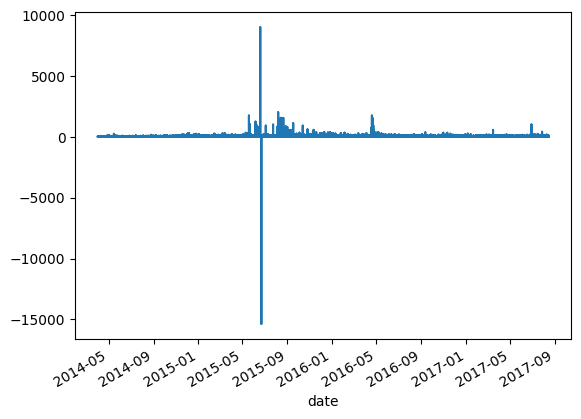

In [46]:
df_train[df_train['item_nbr'] == 1166474].set_index('date')['unit_sales'].plot()

In [47]:
df_neg[df_neg['unit_sales'] > -1]['family'].value_counts()

family
POULTRY         53
MEATS           43
DELI             4
SEAFOOD          3
FROZEN FOODS     2
Name: count, dtype: int64

In [48]:
mask = df_holidays['date'].isin(df_neg['date'].values)
df_holidays_neg = df_holidays[mask]
df_holidays_neg.head()

date     type    locale locale_name                    description  \
96  2014-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
97  2014-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
98  2014-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
99  2014-04-18  Holiday  National     Ecuador                  Viernes Santo   
100 2014-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

     transferred    m_d  
96         False  04-01  
97         False  04-12  
98         False  04-14  
99         False  04-18  
100        False  04-21

In [49]:
df_holidays_neg['description'].value_counts().to_dict()

{'Fundacion de Cuenca': 5,
 'Cantonizacion de Libertad': 4,
 'Dia de la Madre-1': 4,
 'Cantonizacion de Riobamba': 4,
 'Fundacion de Machala': 4,
 'Cantonizacion de Latacunga': 4,
 'Batalla de Pichincha': 4,
 'Cantonizacion del Puyo': 4,
 'Fundacion de Riobamba': 4,
 'Provincializacion de Imbabura': 4,
 'Carnaval': 4,
 'Dia de la Madre': 3,
 'Cantonizacion de Guaranda': 3,
 'Fundacion de Santo Domingo': 3,
 'Provincializacion de Cotopaxi': 3,
 'Dia del Trabajo': 3,
 'Fundacion de Ambato': 3,
 'Fundacion de Esmeraldas': 3,
 'Fundacion de Guayaquil-1': 3,
 'Cantonizacion de El Carmen': 3,
 'Cantonizacion de Salinas': 3,
 'Navidad-3': 3,
 'Fundacion de Loja': 3,
 'Navidad-2': 3,
 'Independencia de Guaranda': 3,
 'Cyber Monday': 3,
 'Independencia de Ambato': 3,
 'Black Friday': 3,
 'Provincializacion de Santo Domingo': 3,
 'Provincializacion Santa Elena': 3,
 'Independencia de Cuenca': 3,
 'Viernes Santo': 3,
 'Primer Grito de Independencia': 3,
 'Primer dia del ano-1': 3,
 'Navidad+1': 3

In [50]:
print(df_neg['perishable'].value_counts())
print(len(df_neg['store_nbr'].unique()))
print(len(df_neg['item_nbr'].unique()))

perishable
0    2854
1     694
Name: count, dtype: int64
54
1306


In [51]:
df_neg['family'].value_counts()

family
GROCERY I           1228
CLEANING             643
BEVERAGES            372
PERSONAL CARE        268
DAIRY                209
BREAD/BAKERY         135
POULTRY              121
MEATS                 94
AUTOMOTIVE            90
LIQUOR,WINE,BEER      69
LINGERIE              68
DELI                  55
FROZEN FOODS          52
PREPARED FOODS        35
EGGS                  30
HOME APPLIANCES       28
SEAFOOD               13
LAWN AND GARDEN       13
BEAUTY                12
GROCERY II             8
HARDWARE               3
PRODUCE                2
Name: count, dtype: int64

In [52]:
df_neg.groupby(['family', 'class'])['item_nbr'].count()

family      class
AUTOMOTIVE  6806      9
            6810      9
            6824     72
BEAUTY      4214      5
            4222      7
                     ..
SEAFOOD     2802      3
            2806      4
            2850      2
            2854      2
            2864      2
Name: item_nbr, Length: 183, dtype: int64

## Valores muy grandes

In [53]:
print(df_train['unit_sales'].quantile(0.99))

62.0


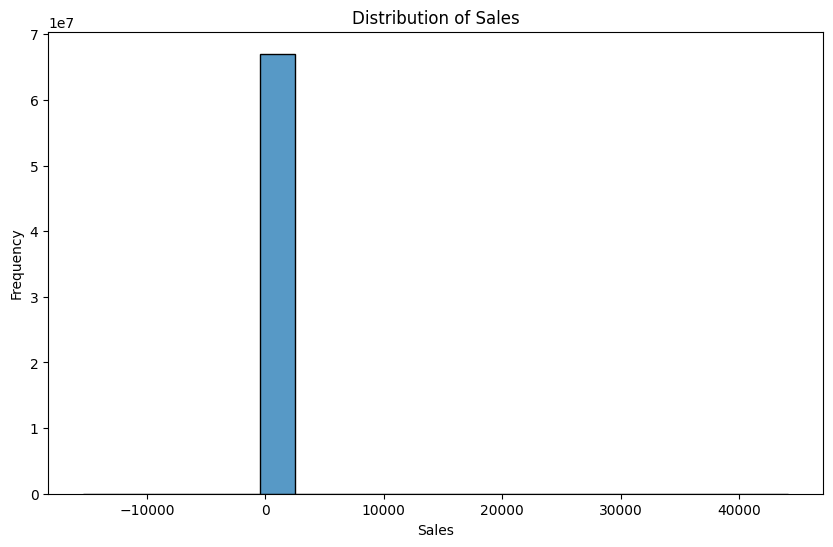

In [54]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df_train['unit_sales'], bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

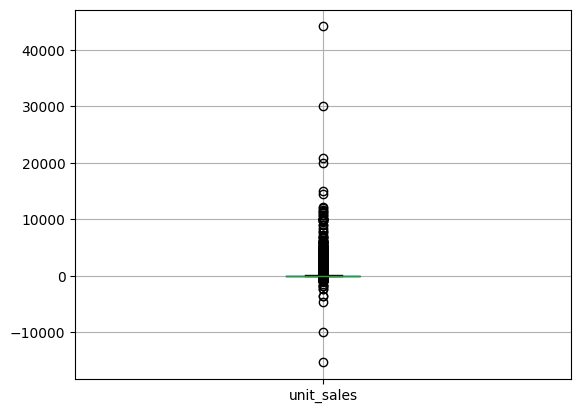

In [55]:
# create a boxplot
boxplot = df_train.boxplot(column=['unit_sales'])
plt.show()

In [56]:
df_out = df_train[df_train['unit_sales']> 2000]

In [57]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 1079053 to 66893012
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           445 non-null    int64         
 1   date         445 non-null    datetime64[ns]
 2   store_nbr    445 non-null    int64         
 3   item_nbr     445 non-null    int64         
 4   unit_sales   445 non-null    float64       
 5   onpromotion  445 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 21.3 KB


In [58]:
df_out['unit_sales'].describe()

count      445.000000
mean      3669.848081
std       3283.263507
min       2001.000000
25%       2302.000000
50%       2735.000000
75%       3674.000000
max      44142.000000
Name: unit_sales, dtype: float64

<Axes: xlabel='date'>

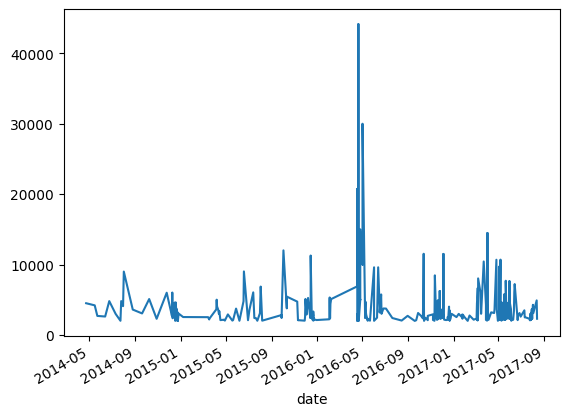

In [59]:
df_out.set_index('date')['unit_sales'].plot()

In [60]:
df_out = pd.merge(df_out, df_items, on='item_nbr')
df_out = pd.merge(df_out, df_stores, on='store_nbr')
df_out_hol = pd.merge(df_out, df_holidays, on='date')

In [61]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           445 non-null    int64         
 1   date         445 non-null    datetime64[ns]
 2   store_nbr    445 non-null    int64         
 3   item_nbr     445 non-null    int64         
 4   unit_sales   445 non-null    float64       
 5   onpromotion  445 non-null    bool          
 6   family       445 non-null    object        
 7   class        445 non-null    int64         
 8   perishable   445 non-null    int64         
 9   city         445 non-null    object        
 10  state        445 non-null    object        
 11  type         445 non-null    object        
 12  cluster      445 non-null    int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 42.3+ KB


In [62]:
df_out= df_out.sort_values(by=['unit_sales'])
# df_out_hol = df_out_hol.sort_values(by=['unit_sales'])

In [63]:
df_out.tail(10)

id       date  store_nbr  item_nbr  unit_sales  onpromotion  \
305   99008984 2016-12-05         38    457574     11510.0        False   
258   93732766 2016-10-13         12    584126     11533.0         True   
100   58240276 2015-10-03         43    903285     12016.0        False   
211   76979651 2016-04-21         45    265559     12228.0        False   
350  111145448 2017-04-02          9    754103     14483.0        False   
223   77387983 2016-04-26          2   1162932     15000.0        False   
227   77959454 2016-05-02          2    305227     20000.0        False   
182   76693277 2016-04-18         45    559870     20748.0        False   
230   77960441 2016-05-02          2   1162932     30000.0        False   
208   76939364 2016-04-21         20    841842     44142.0        False   

           family  class  perishable        city       state type  cluster  
305  FROZEN FOODS   2226           0        Loja        Loja    D        4  
258         MEATS   2302           1   Latacunga    Cotopaxi    C       15  
100       POULTRY   2416           1  Esmeraldas  Esmeraldas    E       10  
211     GROCERY I   1072           0       Quito   Pichincha    A       11  
350     GROCERY I   1072           0       Quito   Pichincha    B        6  
223     GROCERY I   1034           0       Quito   Pichincha    D       13  
227     GROCERY I   1013           0       Quito   Pichincha    D       13  
182     GROCERY I   1072           0       Quito   Pichincha    A       11  
230     GROCERY I   1034           0       Quito   Pichincha    D       13  
208     GROCERY I   1072           0       Quito   Pichincha    B        6

In [64]:
mask = df_holidays['date'].isin(df_out['date'].values)
df_holidays_out = df_holidays[mask]
df_holidays_out.head()

date     type    locale locale_name  \
106 2014-06-12    Event  National     Ecuador   
109 2014-06-23  Holiday     Local    Guaranda   
126 2014-07-23  Holiday     Local     Cayambe   
128 2014-07-25  Holiday     Local   Guayaquil   
148 2014-12-08  Holiday     Local        Loja   

                               description  transferred    m_d  
106  Inauguracion Mundial de futbol Brasil        False  06-12  
109              Cantonizacion de Guaranda        False  06-23  
126               Cantonizacion de Cayambe        False  07-23  
128                 Fundacion de Guayaquil        False  07-25  
148                      Fundacion de Loja        False  12-08

In [65]:
df_holidays_out['description'].value_counts().to_dict()

{'Navidad-3': 3,
 'Fundacion de Guayaquil': 3,
 'Navidad-2': 3,
 'Navidad-4': 3,
 'Cantonizacion de Salinas': 3,
 'Cantonizacion de Guaranda': 2,
 'Fundacion de Loja': 2,
 'Cantonizacion de Cayambe': 2,
 'Fundacion de Ibarra': 2,
 'Independencia de Latacunga': 2,
 'Cantonizacion de Riobamba': 2,
 'Cantonizacion del Puyo': 2,
 'Recupero Puente Navidad': 1,
 'Inauguracion Mundial de futbol Brasil': 1,
 'Cantonizacion de Libertad': 1,
 'Navidad+1': 1,
 'Cyber Monday': 1,
 'Navidad-1': 1,
 'Primer dia del ano-1': 1,
 'Carnaval': 1,
 'Terremoto Manabi+3': 1,
 'Terremoto Manabi+2': 1,
 'Terremoto Manabi+4': 1,
 'Terremoto Manabi+5': 1,
 'Terremoto Manabi+6': 1,
 'Puente Navidad': 1,
 'Terremoto Manabi+10': 1,
 'Terremoto Manabi+16': 1,
 'Terremoto Manabi+23': 1,
 'Terremoto Manabi+24': 1,
 'Terremoto Manabi+26': 1,
 'Terremoto Manabi+30': 1,
 'Fundacion de Riobamba': 1,
 'Provincializacion Santa Elena': 1,
 'Independencia de Ambato': 1,
 'Recupero Puente Dia de Difuntos': 1,
 'Black Friday':

<Axes: xlabel='date'>

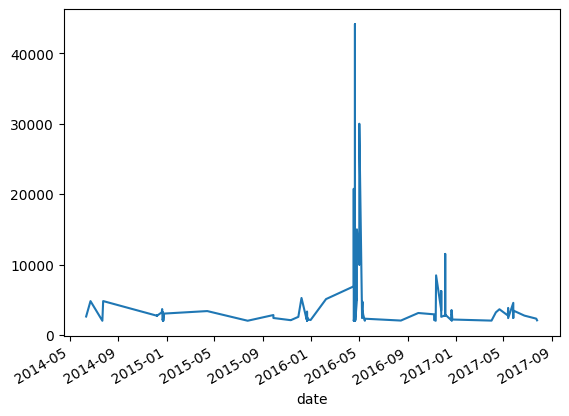

In [66]:
df_out_hol.set_index('date')['unit_sales'].plot()

In [67]:
df_out['family'].value_counts()

family
GROCERY I           246
CLEANING             71
BEVERAGES            55
FROZEN FOODS         34
EGGS                 12
POULTRY               9
PERSONAL CARE         7
LIQUOR,WINE,BEER      4
MEATS                 3
GROCERY II            2
BREAD/BAKERY          1
DAIRY                 1
Name: count, dtype: int64

In [68]:
# groupby(['type', 'locale'])['locale_name'].count()
df_out.groupby(['family', 'class'])['item_nbr'].count()

family            class
BEVERAGES         1120     22
                  1122      6
                  1124     24
                  1126      1
                  1132      1
                  1138      1
BREAD/BAKERY      2718      1
CLEANING          3008      2
                  3026      2
                  3032     65
                  3044      1
                  3046      1
DAIRY             2130      1
EGGS              2502     12
FROZEN FOODS      2226     32
                  2242      1
                  2246      1
GROCERY I         1004     15
                  1010      7
                  1012      5
                  1013      4
                  1014     12
                  1016      1
                  1022     60
                  1026      1
                  1028      5
                  1030      9
                  1032      1
                  1034     10
                  1036      8
                  1039      2
                  1040     25
                

In [69]:
df_out[df_out['item_nbr'] == 1166474]

id       date  store_nbr  item_nbr  unit_sales  onpromotion  \
97  53365584 2015-08-07         45   1166474      2032.0        False   
87  49347648 2015-06-19         18   1166474      9025.0        False   

       family  class  perishable   city      state type  cluster  
97  BEVERAGES   1120           0  Quito  Pichincha    A       11  
87  BEVERAGES   1120           0  Quito  Pichincha    B       16

El `item_nbr` = 1166474 muestra dos picos en las fechas: 2015-08-07 y 2015-06-19. Revisando el calendario podemos observar que:

* 2015-08-07 = Día Internacional de la Cerveza
* 2015-06-19 = Día Internacional para la Eliminación de la Violencia Sexual en los Conflictos

Estos picos han sido generados sobre productos de la familia BEVERAGES por las celebraciones

## Agregando features al dataset de entrenamiento

Una vez analizado el contenido y estructura de los datos, hemos observado lo siguiente:
- El dataset de entrenamiento final contiene 67,029,280
- La feature unit_sales, muestra valores decimales, negativos y muy grandes (afectados por los holidays)
- Existen más datos que pueden ayudar al modelo a identificar o aprender sobre la configuración de días de este tipo
- Agregar columnas de tablas como: 
  - holidays: date,type,local y transferred
  - item: family, perishable
  - store: type, clluster
  - transaction: date,transactions

Esas son las nuevas columnas que se aregaran al dataset de entrenamiento

In [70]:
# Agregando las columnas de items
df_train = pd.merge(df_train, df_items, on='item_nbr')

# Agregando las columnas de stores
df_train = pd.merge(df_train, df_stores, on='store_nbr')

In [ ]:
# Agregando las columnas de transacciones
# df_train = pd.merge(df_train, df_transactions, on='store_nbr')

In [71]:
df_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67029280 entries, 0 to 67029279
Data columns (total 13 columns):
 #   Column       Non-Null Count     Dtype         
---  ------       --------------     -----         
 0   id           67029280 non-null  int64         
 1   date         67029280 non-null  datetime64[ns]
 2   store_nbr    67029280 non-null  int64         
 3   item_nbr     67029280 non-null  int64         
 4   unit_sales   67029280 non-null  float64       
 5   onpromotion  67029280 non-null  bool          
 6   family       67029280 non-null  object        
 7   class        67029280 non-null  int64         
 8   perishable   67029280 non-null  int64         
 9   city         67029280 non-null  object        
 10  state        67029280 non-null  object        
 11  type         67029280 non-null  object        
 12  cluster      67029280 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 6.1+ GB


In [72]:
df_train = pd.merge(df_train, df_holidays, on='date', how='left')

In [73]:
df_train.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68422554 entries, 0 to 68422553
Data columns (total 19 columns):
 #   Column       Non-Null Count     Dtype         
---  ------       --------------     -----         
 0   id           68422554 non-null  int64         
 1   date         68422554 non-null  datetime64[ns]
 2   store_nbr    68422554 non-null  int64         
 3   item_nbr     68422554 non-null  int64         
 4   unit_sales   68422554 non-null  float64       
 5   onpromotion  68422554 non-null  bool          
 6   family       68422554 non-null  object        
 7   class        68422554 non-null  int64         
 8   perishable   68422554 non-null  int64         
 9   city         68422554 non-null  object        
 10  state        68422554 non-null  object        
 11  type_x       68422554 non-null  object        
 12  cluster      68422554 non-null  int64         
 13  type_y       12387921 non-null  object        
 14  locale       12387921 non-null  object        
 

In [74]:
df_train.head()

id       date  store_nbr  item_nbr  unit_sales  onpromotion  \
0  21657651 2014-04-01          1    103520         1.0        False   
1  21657652 2014-04-01          1    103665         3.0        False   
2  21657653 2014-04-01          1    105574         1.0        False   
3  21657654 2014-04-01          1    105575        11.0        False   
4  21657655 2014-04-01          1    105577         4.0        False   

         family  class  perishable   city      state type_x  cluster   type_y  \
0     GROCERY I   1028           0  Quito  Pichincha      D       13  Holiday   
1  BREAD/BAKERY   2712           1  Quito  Pichincha      D       13  Holiday   
2     GROCERY I   1045           0  Quito  Pichincha      D       13  Holiday   
3     GROCERY I   1045           0  Quito  Pichincha      D       13  Holiday   
4     GROCERY I   1045           0  Quito  Pichincha      D       13  Holiday   

     locale locale_name                    description transferred    m_d  
0  Regional    Cotopaxi  Provincializacion de Cotopaxi       False  04-01  
1  Regional    Cotopaxi  Provincializacion de Cotopaxi       False  04-01  
2  Regional    Cotopaxi  Provincializacion de Cotopaxi       False  04-01  
3  Regional    Cotopaxi  Provincializacion de Cotopaxi       False  04-01  
4  Regional    Cotopaxi  Provincializacion de Cotopaxi       False  04-01

In [79]:
# Borrando columnas no necesarias
# df_train = df_train.drop(['id', 'class','city','state','locale_name','description','m_d'], axis=1)
df_train = df_train.drop(['locale'], axis=1)

In [80]:
df_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68422554 entries, 0 to 68422553
Data columns (total 11 columns):
 #   Column       Non-Null Count     Dtype         
---  ------       --------------     -----         
 0   date         68422554 non-null  datetime64[ns]
 1   store_nbr    68422554 non-null  int64         
 2   item_nbr     68422554 non-null  int64         
 3   unit_sales   68422554 non-null  float64       
 4   onpromotion  68422554 non-null  bool          
 5   family       68422554 non-null  object        
 6   perishable   68422554 non-null  int64         
 7   type_x       68422554 non-null  object        
 8   cluster      68422554 non-null  int64         
 9   type_y       12387921 non-null  object        
 10  transferred  12387921 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 5.2+ GB


In [84]:
df_train = df_train.rename(
    columns={"type_x": "type_store", "type_y": "type_holiday"})

In [85]:
df_train['type_holiday'].fillna('None', inplace=True)
df_train['transferred'].fillna(False, inplace=True)

In [86]:
df_train.to_csv("data/train_join.csv", index=False)